In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('week1.csv')
df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH


In [3]:
df.shape

(986022, 19)

<AxesSubplot:>

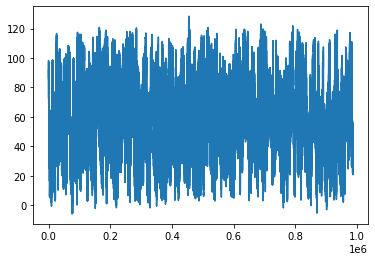

In [4]:
df.x.plot()

In [5]:
df2 = pd.read_csv('plays.csv')
df2.head().T

,0,1,2,3,4
gameId,2018090600,2018090600,2018090600,2018090600,2018090600
playId,75,146,168,190,256
playDescription,(15:00) M.Ryan pass short right to J.Jones pus...,(13:10) M.Ryan pass incomplete short right to ...,(13:05) (Shotgun) M.Ryan pass incomplete short...,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,(10:59) (Shotgun) M.Ryan pass incomplete short...
quarter,1,1,1,1,1
down,1,1,2,3,3
yardsToGo,15,10,10,10,1
possessionTeam,ATL,ATL,ATL,ATL,ATL
playType,play_type_pass,play_type_pass,play_type_pass,play_type_pass,play_type_pass
yardlineSide,ATL,PHI,PHI,PHI,PHI
yardlineNumber,20,39,39,39,1


In [6]:
df2.shape

(19239, 27)

In [7]:
df2.passResult.value_counts()

C     11370
I      6135
S      1308
IN      420
R         4
Name: passResult, dtype: int64

In [8]:
df2.playType.value_counts()

play_type_pass       17346
play_type_sack        1260
play_type_unknown      633
Name: playType, dtype: int64

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

In [10]:
df3 = df2[['playDescription','quarter', 'down', 'yardsToGo', 'possessionTeam', 'playType','offenseFormation','personnelO', 'defendersInTheBox', 'numberOfPassRushers', 'personnelD', 'typeDropback', 'gameClock', 'absoluteYardlineNumber', 'epa',]]
df3.head()

,playDescription,quarter,down,yardsToGo,possessionTeam,playType,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,gameClock,absoluteYardlineNumber,epa
0,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,15:00:00,90.0,0.261827
1,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,13:10:00,49.0,-0.372360
2,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,13:05:00,49.0,-0.702779
3,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,13:01:00,49.0,3.047530
4,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,10:59:00,11.0,-0.842272


In [19]:
df3.personnelO.str.replace(r'\D\s\D\s\D', '')
#df3.personnelD = df3.personnelD.str.replace(r'\D', '')
d#f3 = df3[df3.playType == 'play_type_pass']

NameError: name 'd' is not defined

In [14]:
df3.personnelO.value_counts()

1 RB, 1 TE, 3 WR                            13716
1 RB, 2 TE, 2 WR                             2737
2 RB, 1 TE, 2 WR                             1083
1 RB, 3 TE, 1 WR                              406
1 RB, 0 TE, 4 WR                              273
0 RB, 1 TE, 4 WR                              173
2 RB, 2 TE, 1 WR                              165
2 RB, 0 TE, 3 WR                              148
6 OL, 1 RB, 1 TE, 2 WR                        111
2 QB, 1 RB, 1 TE, 2 WR                         56
0 RB, 2 TE, 3 WR                               51
6 OL, 1 RB, 2 TE, 1 WR                         48
0 RB, 0 TE, 5 WR                               36
6 OL, 1 RB, 0 TE, 3 WR                         29
6 OL, 2 RB, 2 TE, 0 WR                         21
3 RB, 1 TE, 1 WR                               19
3 RB, 0 TE, 2 WR                               13
2 RB, 3 TE, 0 WR                               12
6 OL, 2 RB, 1 TE, 1 WR                         11
6 OL, 2 RB, 0 TE, 2 WR                         10


In [15]:
df3.personnelD.value_counts()

4 DL, 2 LB, 5 DB                    6652
3 DL, 3 LB, 5 DB                    3103
4 DL, 3 LB, 4 DB                    2407
2 DL, 4 LB, 5 DB                    2109
4 DL, 1 LB, 6 DB                    1104
3 DL, 2 LB, 6 DB                    1047
2 DL, 3 LB, 6 DB                     917
3 DL, 4 LB, 4 DB                     743
1 DL, 4 LB, 6 DB                     311
1 DL, 5 LB, 5 DB                     266
1 DL, 3 LB, 7 DB                     102
5 DL, 2 LB, 4 DB                      93
3 DL, 1 LB, 7 DB                      82
2 DL, 2 LB, 7 DB                      71
0 DL, 4 LB, 7 DB                      32
4 DL, 0 LB, 7 DB                      24
4 DL, 4 LB, 3 DB                      23
0 DL, 5 LB, 6 DB                      17
5 DL, 3 LB, 3 DB                      14
5 DL, 1 LB, 5 DB                      13
6 DL, 4 LB, 1 DB                      12
6 DL, 3 LB, 2 DB                      12
0 DL, 6 LB, 5 DB                       6
4 DL, 5 LB, 2 DB                       4
2 DL, 3 LB, 5 DB